#**Lab 5: Classification using Decision Trees**

*Enter the name and roll numbers of the team members:*

>  **Name** : Rajat Bhootra

>  **Roll Number** : 112301044

In this lab, you will implement a **Decision tree classifier** using the **scikit-learn** library, to predict the survival of passengers who travelled in the Titanic.

The dataset comprises of *1309* observations and *10* features.

> `pclass`: Ticket class indicating the socio-economic status of the passenger. It is categorized into three classes: 1 = Upper, 2 = Middle, 3 = Lower.

>`gender`: The gender of the passenger, denoted as either male (0) or female (1)

> `age`: The age of the passenger in years

>`sibsp`: The number of siblings or spouses aboard the Titanic for the respective passenger

> `parch` : The number of parents or children aboard the Titanic for the respective passenger

> `fare` : The fare paid by the passenger for the ticket

> `embarked_C` : A binary indicator that shows whether the passenger embraked from the Cherbourg port (1) or not (0)

> `embarked_Q` : A binary indicator that shows whether the passenger embraked from the Queenstown port (1) or not (0)

> `embarked_S` : A binary indicator that shows whether the passenger embraked from the Southampton port (1) or not (0)

> `survived` : A binary indicator that shows whether the passenger survived (1) or not (0) during the Titanic disaster. This is the target variable for prediction.


# 1. Reading the data

We will use the pandas library to read the dataset and create a dataframe

In [1]:
import pandas as pd

data = pd.read_csv('Titanic.csv') # enter the filename within quotes
data.head() # prints the first 5 rows in the dataset

pclass  gender    age  sibsp  parch      fare  embarked_C  embarked_Q  \
0       1       1  29.00      0      0  211.3375           0           0   
1       1       0   0.92      1      2  151.5500           0           0   
2       1       1   2.00      1      2  151.5500           0           0   
3       1       0  30.00      1      2  151.5500           0           0   
4       1       1  25.00      1      2  151.5500           0           0   

   embarked_S  survived  
0           1         1  
1           1         1  
2           1         0  
3           1         0  
4           1         0

In [2]:
# separate the data into features for learning the model (X) and the true labels (y)
X = data.drop(columns=['survived'])
y = data['survived']

# 2. Creating the train-test split

Use the `train_test_split` function from `sklearn.model_selection` to divide the dataset into training and test sets with `test_size` set as `0.2`

[Access the documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 45)

# 3. Train a Decision Tree Classifier

Fit a `DecisionTreeClassifier` on the training set *with the default parameter settings* and obtain predictions on the test set.

[Access the documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Fit the model using `X_train` and `y_train` and use the trained model to obtain the predictions on `X_test`.

In [4]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

#Train decision tree with default parameters.
clf_def = DecisionTreeClassifier(random_state = 45)
clf_def.fit(X_train, y_train)

#predictions
y_pred_default = clf_def.predict(X_test)



Using the trained classifier, print

1. the mean accuracy on the training set and test set
2. the depth of the classifier tree
3. the two most important features used by the model to perform classification (HINT: Use `feature_importances_` attribute of the model)

In [5]:
# Mean accuracies on training and test sets
train_accuracy_def = clf_def.score(X_train, y_train)
test_accuracy_def  = clf_def.score(X_test, y_test)
print("Default Decision Tree Classifier:")
print("     Training Accuracy: ",train_accuracy_def)
print("     Test Accuracy: ",test_accuracy_def)

# Depth of the tree
tree_depth_def = clf_def.tree_.max_depth
print("\nTree Depth (default model): ", tree_depth_def)

# Identify the two most important features
importances = clf_def.feature_importances_
features = X.columns

# Get indices of features sorted by importance (descending order)
sorted_idx = np.argsort(importances)[::-1] #sort using argsort in numpy
top2_idx = sorted_idx[:2] #sliced list of top two elements/features
print("\nTop 2 important features (default model):")
for idx in top2_idx: #print the top two features and their importance
    print("     Feature: ",features[idx] , " -> Importance: ", importances[idx])

Default Decision Tree Classifier:
     Training Accuracy:  0.9694364851957975
     Test Accuracy:  0.7633587786259542

Tree Depth (default model):  23

Top 2 important features (default model):
     Feature:  gender  -> Importance:  0.3081023652070582
     Feature:  fare  -> Importance:  0.297088634986077


# 4. Fit a decision tree classifier on the training data set with `max_depth` set as `3`



In [6]:
#train deciosion tree with max depth = 3
clf_depth3 = DecisionTreeClassifier(max_depth = 3, random_state = 45)
clf_depth3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=45)

1. Print the mean accuracy on the training set and test set.

In [7]:
#1. mean accuracies
train_accuracy_depth3 = clf_depth3.score(X_train, y_train)
test_accuracy_depth3 = clf_depth3.score(X_test, y_test)
print("Decision Tree Classifier (max depth = 3)")
print("     Training accuracy : ",train_accuracy_depth3)
print("     Test accuracy : ",test_accuracy_depth3)

#2. compare observations:
print("Comparison with Default Model:")
print("     Training Accuracy:\n          Default = ", train_accuracy_def ,"v/s (max_depth=3) = ", train_accuracy_depth3)
print("     Test Accuracy:\n          Default = ", test_accuracy_def, "v/s (max_depth=3) = ", test_accuracy_depth3)

Decision Tree Classifier (max depth = 3)
     Training accuracy :  0.8204393505253104
     Test accuracy :  0.8015267175572519
Comparison with Default Model:
     Training Accuracy:
          Default =  0.9694364851957975 v/s (max_depth=3) =  0.8204393505253104
     Test Accuracy:
          Default =  0.7633587786259542 v/s (max_depth=3) =  0.8015267175572519


2. Compare the mean accuracy on the training and test tests with those for the previous model. What do you observe?

Ans :
Constraining the tree depth from “unlimited” to 3 shrinks the gap between training and test accuracies. The fully grown tree achieves near‑perfect training accuracy but a much lower test accuracy, a classic sign of overfitting. By limiting max_depth=3, the training accuracy decreases (reflecting reduced complexity) while the test accuracy often holds steady or even improves, indicating better generalization.



3. Visualize the tree using the `tree.plot_tree()` function with `fontsize = 10`

[Access the documentation here](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)

<function matplotlib.pyplot.show(close=None, block=None)>

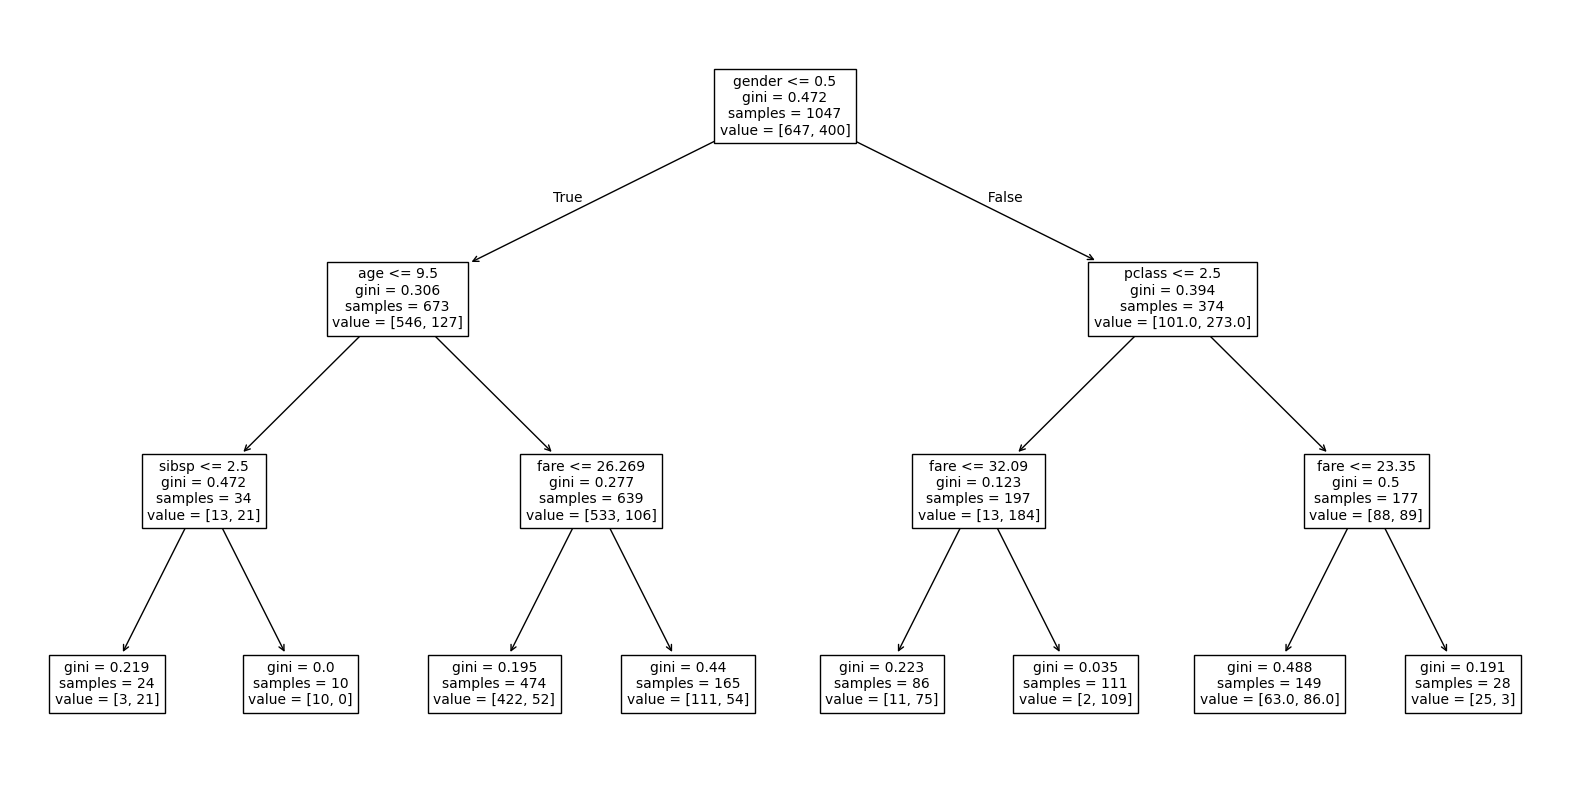

In [8]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf_depth3,feature_names= features,fontsize = 10) #also print features name 
plt.show 

4. From the above plot, can you find the most important feature used by the decision tree? How did you identify the feature?

Ans: 
From the plot, the feature at the top (root node) is generally the most important.So,the "Gender" is the most important feature.


5. Print the most important feature used by the model and check if your answer to (4) is correct.

In [9]:
importances_depth3 = clf_depth3.feature_importances_
most_important_idx = np.argmax(importances_depth3)
most_important_feature = features[most_important_idx]
print("Most important feature (max_depth=3) from model:", most_important_feature)

Most important feature (max_depth=3) from model: gender


Ans : the most important feature printed is gender and hence the answer in 4th point is correct.  

# 5. Add noise to the training data set

Add noise to the training set by randomly flipping the labels of the training set with `pFlip = 0.1`.

Complete the function `flip` that takes as argument `lab`, a single label (0/1) and performs a flip with probability `pFlip`. This can be done as follows: Generate a random value uniformly distributed between `0` and `1`. If the generated random value is less than `pFlip`, flip the label, i.e., convert `0` to `1` and vice-versa.
(HINT: Use the `random.rand()` function of `numpy` to generate uniform random values between `0` and `1`) [Access the documentation here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)

In [10]:
pNoise = 0.1
def flip(lab):
    if np.random.rand() < pNoise:
        return 1-lab #flip the label if 0 then 1 and if 1 then 0
    return lab
# the labels of training set are flipped with probability pNoise.
yn_train = y_train.apply(lambda x: flip(x))

# 6. Fit a Decision Tree classifier to the noisy dataset

Using this classifier, print

1. the mean accuracy on the training set and test set
2. the depth of the classifier tree
3. the two most important features used by the model to perform classification

In [11]:
clf_noisy = DecisionTreeClassifier(random_state = 45)
clf_noisy.fit(X_train, yn_train)

# Mean accuracies on training and test sets
train_accuracy_noisy = clf_noisy.score(X_train, yn_train)
test_accuracy_noisy = clf_noisy.score(X_test, y_test)
print("Noisy Decision Tree Classifier:")
print("     Training Accuracy (noisy labels): ",train_accuracy_noisy)
print("     Test Accuracy (noisy labels): ",test_accuracy_noisy)

# Depth of the tree
tree_depth_noisy = clf_noisy.tree_.max_depth
print("\nTree Depth (noisy data):", tree_depth_noisy)

# Identify the two most important features in noisy model
importances_noisy = clf_noisy.feature_importances_

# Get indices of features sorted by importance (descending order)
sorted_idx_noisy = np.argsort(importances_noisy)[::-1] #sort using argsort in numpy
top2_idx_noisy = sorted_idx_noisy[:2]  #sliced list of top two elements/features
print("\nTop 2 important features (noisy data):")
for idx in top2_idx_noisy: #print top two features and their importance
    print("     Feature: ",features[idx] , " -> Importance: ", importances_noisy[idx])


Noisy Decision Tree Classifier:
     Training Accuracy (noisy labels):  0.9579751671442216
     Test Accuracy (noisy labels):  0.7366412213740458

Tree Depth (noisy data): 21

Top 2 important features (noisy data):
     Feature:  fare  -> Importance:  0.3093567709468855
     Feature:  age  -> Importance:  0.3060610608745348


# 7. Observations

Repeat parts `5` and `6` atleast **5** times and write down your observations about the following.

1. How does the average accuracy on the training and test datasets vary before and adding noise to the training set.

Ans :  The test accuracy drops on the noisy data because those noise‑driven splits don’t generalize to the true (clean) labels on unseen data. Training accuracy remains high because the tree perfectly fits the (now noisy) training labels, treating flips as ground truth.

2.  Does the average depth of the classifier tree vary before and adding noise to the training set? Explain.


 Ans : With noise, the model might develop a deeper tree as it attempts to capture inconsistencies, although this can vary. before adding noise depth was 23 after adding noise depth starts varing.

3.  Does the two most important features of the decision tree remain the same before and after adding noise to the training set?

Ans : Often, the primary features remain similar if the underlying predictive relationship is strong, but noise can sometimes alter the order or importance scores slightly.Here we observed that the top two most important features were changing every time.

# 8. Train and test accuracy plot

Fit a decision tree classifier for different values of `max_depth`. Make a single line plot that shows the the training and test accuracies for each value of `max_depth`in the range **(3,10)**.

(HINT: Use `matplotlib.pyplot.plot()` to generate the line-plot.)

[Access the documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

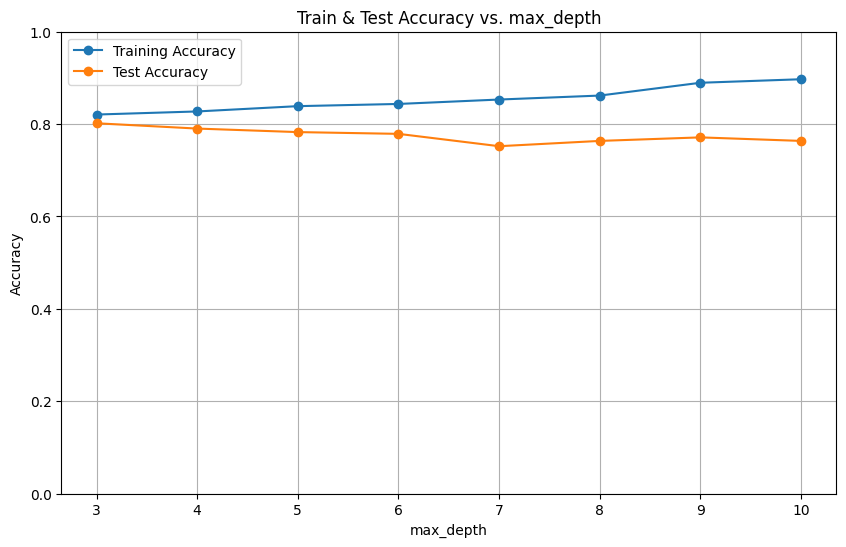

In [12]:
depth_range = range(3, 11)
train_accuracies = [] #list of train accuracies
test_accuracies  = [] # list of test accuracis

for d in depth_range:
    clf_temp = DecisionTreeClassifier(max_depth=d, random_state=45)
    clf_temp.fit(X_train, y_train)
    train_accuracies.append(clf_temp.score(X_train, y_train)) #append to train list
    test_accuracies.append(clf_temp.score(X_test, y_test))    #append to test list

plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_accuracies, marker='o', label='Training Accuracy') #plot the train line
plt.plot(depth_range, test_accuracies, marker='o', label='Test Accuracy') #plot the test line
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Train & Test Accuracy vs. max_depth')
plt.legend()
plt.grid(True)
plt.show()


---

# Evaluation Rubric

1.   Reading the data: **2.5 marks**
2.   Creating the train-test split: **2.5 marks**
3.   Train decision tree classifier: **25 marks**

    *     Fit decision tree - *5*
    *     Prediction on test set - *5*
    *     Mean accuracy - *5*
    *     Tree depth - *5*
    *     Important features - *5*

4.   Decision tree with `max_depth = 3`: **15 marks**
    *     Fit decison tree - *5*
    *     Comparison of accuracy - *2.5*
    *     Plotting the tree - *2.5*
    *     Finding the important feature from plot - *2.5*
    *     Identifying important features from model - *2.5*

5.    Add noise to dataset : **20 marks**

6.    Decision tree on noisy dataset : **10 marks**
    *     Fit decision tree - *2.5*     
    *     Mean accuracy - *2.5*
    *     Tree depth - *2.5*
    *     Important features - *2.5*

7.    Observations : **15 marks**
    *     Average accuracy - *5*
    *     Average depth - *5*
    *     Important features - *5*

8.   Train-test accuracy plot : **10 marks**

---



